<a href="https://colab.research.google.com/github/MaCroDmT/python/blob/main/Flood_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Loading both the cleaned and uncleaned datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

cleaned_data_path = '/content/drive/My Drive/ML/flood[Cleaned].csv'
uncleaned_data_path = '/content/drive/My Drive/ML/flood.csv'


cleaned_df = pd.read_csv(cleaned_data_path)
uncleaned_df = pd.read_csv(uncleaned_data_path)


print("Cleaned Data (first 5 rows):")
print(cleaned_df.head())
print("\nUncleaned Data (first 5 rows):")
print(uncleaned_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cleaned Data (first 5 rows):
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0         -0.890321            1.342509         0.441028       0.446084   
1          1.345004           -0.438066        -0.007144       0.895983   
2         -0.890321            2.232796        -0.455316      -1.803411   
3         -0.443256           -0.438066        -1.351659       0.895983   
4         -0.890321            0.897365        -0.007144      -1.353512   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0     -0.440927      -0.443851     0.438597  -1.338607              -0.897767   
1      0.896486       1.801586    -1.788597   0.005106              -0.002739   
2      0.896486       0.005236    -0.452281   0.900915              -0.450253   
3     -0.886732      -0.443851    -1.788597  -0.442798             

Summary

In [ ]:
print("Cleaned Data Summary Statistics:")
print(cleaned_df.describe())

print("\nUncleaned Data Summary Statistics:")
print(uncleaned_df.describe())


Cleaned Data Summary Statistics:
       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      44887.000000        44887.000000     44887.000000   44887.000000   
mean          -0.017146           -0.020839        -0.019754      -0.017597   
std            0.971960            0.969881         0.971611       0.969740   
min           -2.231515           -2.218641        -2.248002      -2.253310   
25%           -0.890321           -0.883210        -0.903487      -0.903613   
50%            0.003809            0.007078        -0.007144      -0.003815   
75%            0.450874            0.452222         0.441028       0.446084   
max            2.686198            2.677940         2.681886       2.695579   

       Urbanization  ClimateChange   DamsQuality     Siltation  \
count  44887.000000   44887.000000  44887.000000  44887.000000   
mean      -0.019873      -0.018705     -0.020933     -0.020499   
std        0.966928       0.969216      0.971200      0.9

Visualization of the data distribution


In [ ]:
scaler_cleaned = StandardScaler()
cleaned_scaled = pd.DataFrame(scaler_cleaned.fit_transform(cleaned_df), columns=cleaned_df.columns)
cleaned_corr_matrix = cleaned_df.corr()

Correlation heatmap for the cleaned dataset

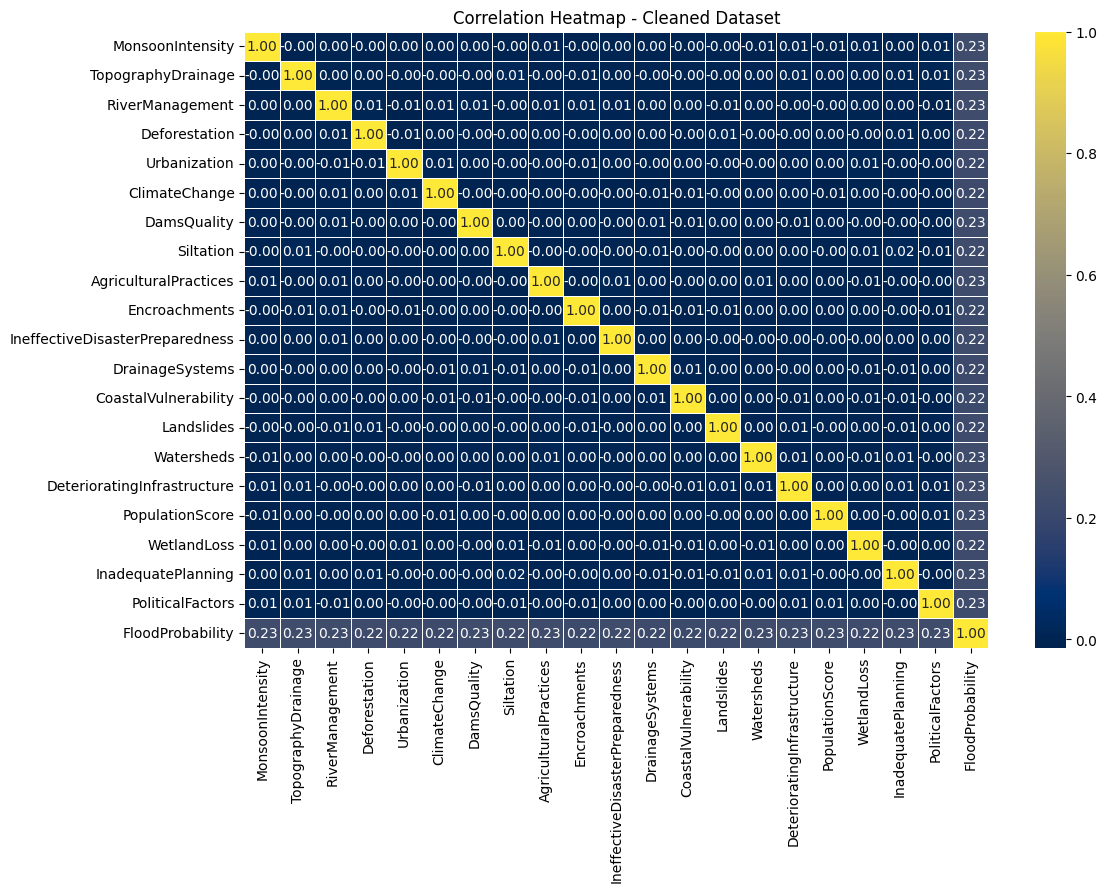

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_corr_matrix, annot=True, cmap='cividis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - Cleaned Dataset')
plt.show()

In [ ]:
scaler_uncleaned = StandardScaler()
uncleaned_scaled = pd.DataFrame(scaler_uncleaned.fit_transform(uncleaned_df), columns=uncleaned_df.columns)
uncleaned_corr_matrix = uncleaned_df.corr()

Correlation heatmap for the uncleaned dataset

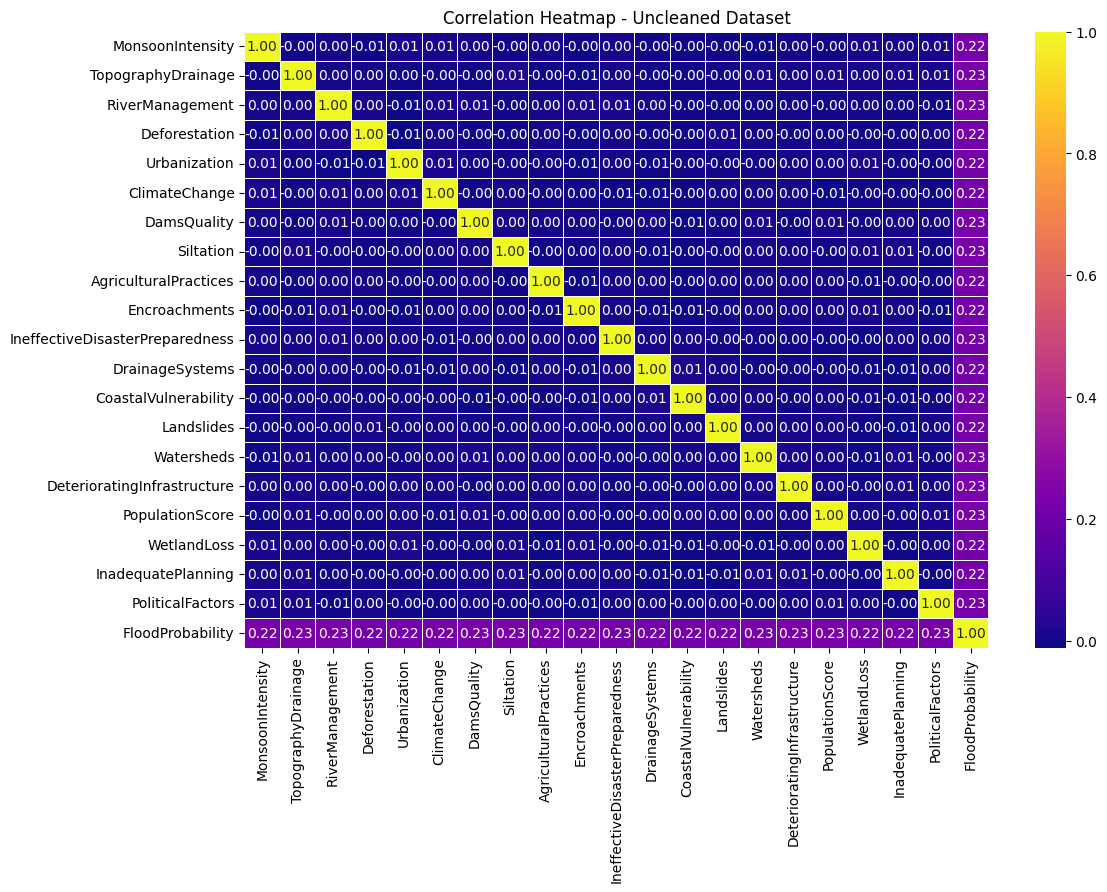

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(uncleaned_corr_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - Uncleaned Dataset')
plt.show()

Correlation Bar Plot for Selected Features (Cleaned Dataset)

Separate the target variable and features for both datasets

In [ ]:
X_cleaned = cleaned_df.drop(columns=['FloodProbability'])
y_cleaned = cleaned_df['FloodProbability']

X_uncleaned = uncleaned_df.drop(columns=['FloodProbability'])
y_uncleaned = uncleaned_df['FloodProbability']


Splitting the data into training and testing sets

In [ ]:
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

X_uncleaned_train, X_uncleaned_test, y_uncleaned_train, y_uncleaned_test = train_test_split(X_uncleaned, y_uncleaned, test_size=0.2, random_state=42)


In [ ]:
scaler_cleaned = StandardScaler()
X_cleaned_train = scaler_cleaned.fit_transform(X_cleaned_train)
X_cleaned_test = scaler_cleaned.transform(X_cleaned_test)

In [ ]:
scaler_uncleaned = StandardScaler()
X_uncleaned_train = scaler_uncleaned.fit_transform(X_uncleaned_train)
X_uncleaned_test = scaler_uncleaned.transform(X_uncleaned_test)

Training the Random Forest model

In [ ]:
rf_cleaned = RandomForestRegressor(n_estimators=100, random_state=42)
rf_uncleaned = RandomForestRegressor(n_estimators=100, random_state=42)

rf_cleaned.fit(X_cleaned_train, y_cleaned_train)
rf_uncleaned.fit(X_uncleaned_train, y_uncleaned_train)


RandomForestRegressor(random_state=42)

Evaluating the model on the testing set

In [ ]:
y_cleaned_pred = rf_cleaned.predict(X_cleaned_test)
y_uncleaned_pred = rf_uncleaned.predict(X_uncleaned_test)

mae_cleaned = mean_absolute_error(y_cleaned_test, y_cleaned_pred)
mse_cleaned = mean_squared_error(y_cleaned_test, y_cleaned_pred)
r2_cleaned = r2_score(y_cleaned_test, y_cleaned_pred)

mae_uncleaned = mean_absolute_error(y_uncleaned_test, y_uncleaned_pred)
mse_uncleaned = mean_squared_error(y_uncleaned_test, y_uncleaned_pred)
r2_uncleaned = r2_score(y_uncleaned_test, y_uncleaned_pred)


The results of cleaned dataset

In [ ]:
print("Cleaned Dataset Performance:")
print(f"MAE: {mae_cleaned}")
print(f"MSE: {mse_cleaned}")
print(f"R squared: {r2_cleaned}")

Cleaned Dataset Performance:
MAE: 0.01967418133214525
MSE: 0.0006185857117398089
R squared: 0.7429737050148606


The results of cleaned dataset

In [ ]:
print("\nUncleaned Dataset Performance:")
print(f"MAE: {mae_uncleaned}")
print(f"MSE: {mse_uncleaned}")
print(f"R squared: {r2_uncleaned}")


Uncleaned Dataset Performance:
MAE: 0.020476960000000013
MSE: 0.0006709671785000003
R squared: 0.7305986432373353


Visualizing the performance of the model

Actual vs Predicted for Cleaned Dataset

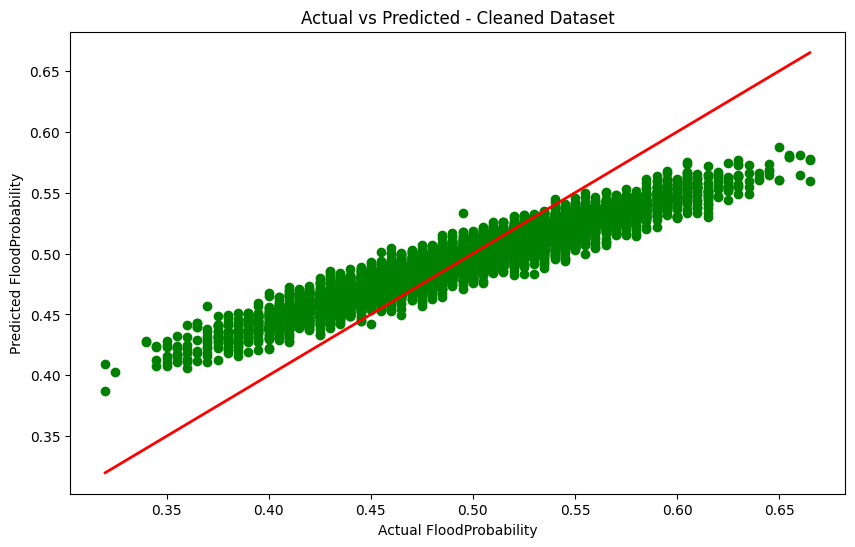

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_cleaned_test, y_cleaned_pred, color='green')
plt.plot([y_cleaned_test.min(), y_cleaned_test.max()], [y_cleaned_test.min(), y_cleaned_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted - Cleaned Dataset")
plt.xlabel("Actual FloodProbability")
plt.ylabel("Predicted FloodProbability")
plt.show()

Actual vs Predicted for Uncleaned Dataset

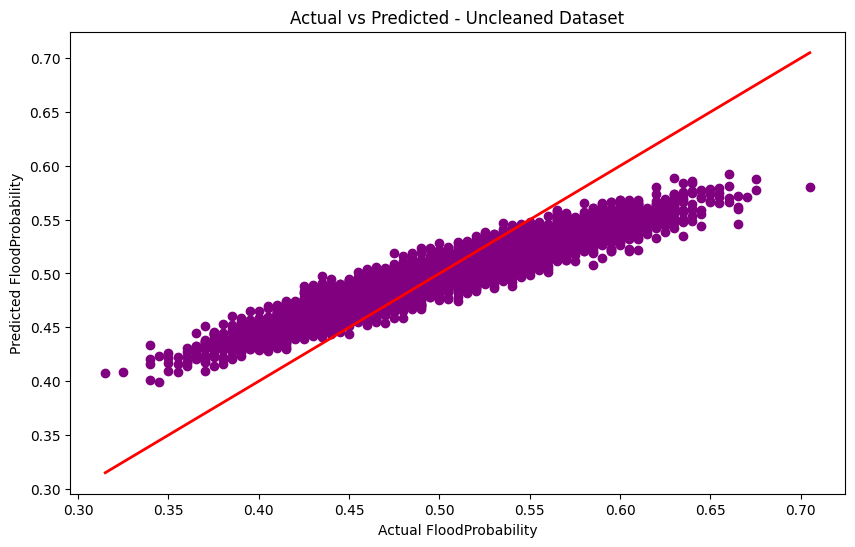

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_uncleaned_test, y_uncleaned_pred, color='purple')
plt.plot([y_uncleaned_test.min(), y_uncleaned_test.max()], [y_uncleaned_test.min(), y_uncleaned_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted - Uncleaned Dataset")
plt.xlabel("Actual FloodProbability")
plt.ylabel("Predicted FloodProbability")
plt.show()

Residual Plot for Cleaned Dataset

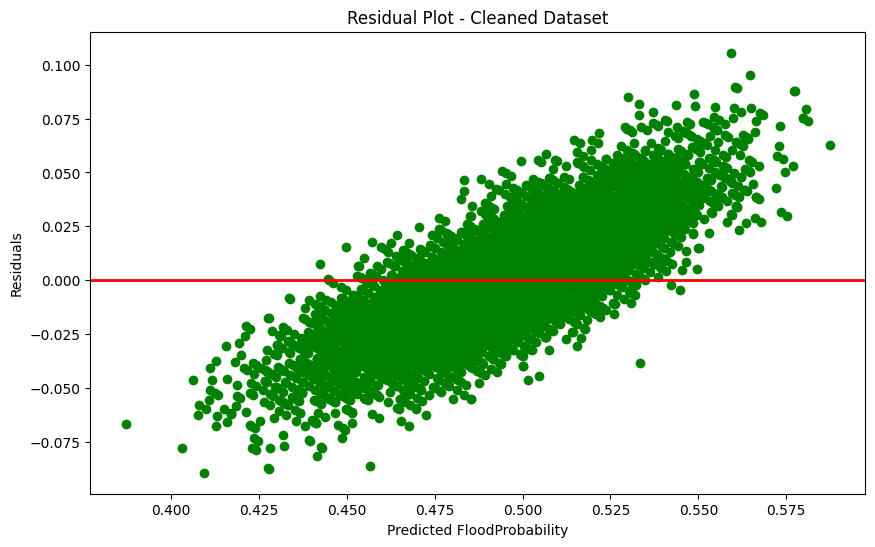

In [ ]:
residuals_cleaned = y_cleaned_test - y_cleaned_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_cleaned_pred, residuals_cleaned, color='green')
plt.axhline(0, color='red', linewidth=2)
plt.title("Residual Plot - Cleaned Dataset")
plt.xlabel("Predicted FloodProbability")
plt.ylabel("Residuals")
plt.show()

Residual Plot for Uncleaned Dataset

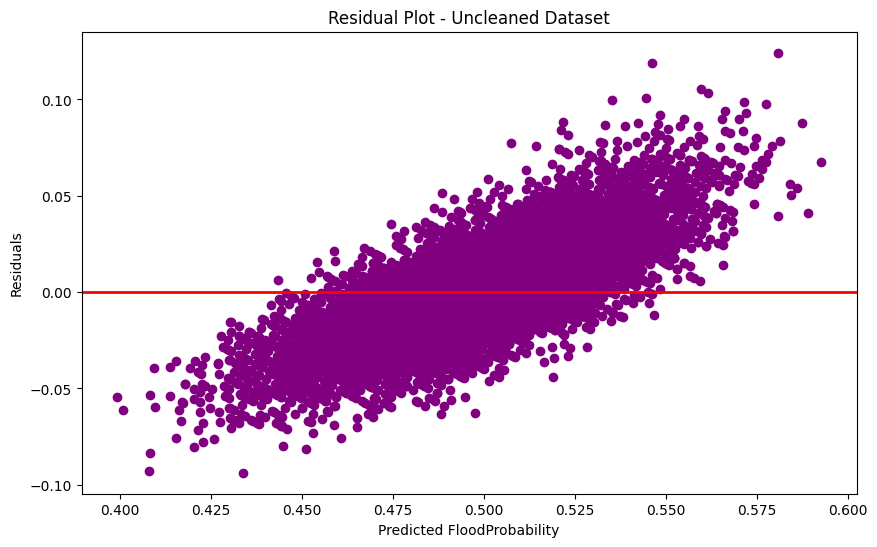

In [ ]:
residuals_uncleaned = y_uncleaned_test - y_uncleaned_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_uncleaned_pred, residuals_uncleaned, color='purple')
plt.axhline(0, color='red', linewidth=2)
plt.title("Residual Plot - Uncleaned Dataset")
plt.xlabel("Predicted FloodProbability")
plt.ylabel("Residuals")
plt.show()

Feature importance for the Random Forest model (Cleaned Dataset)

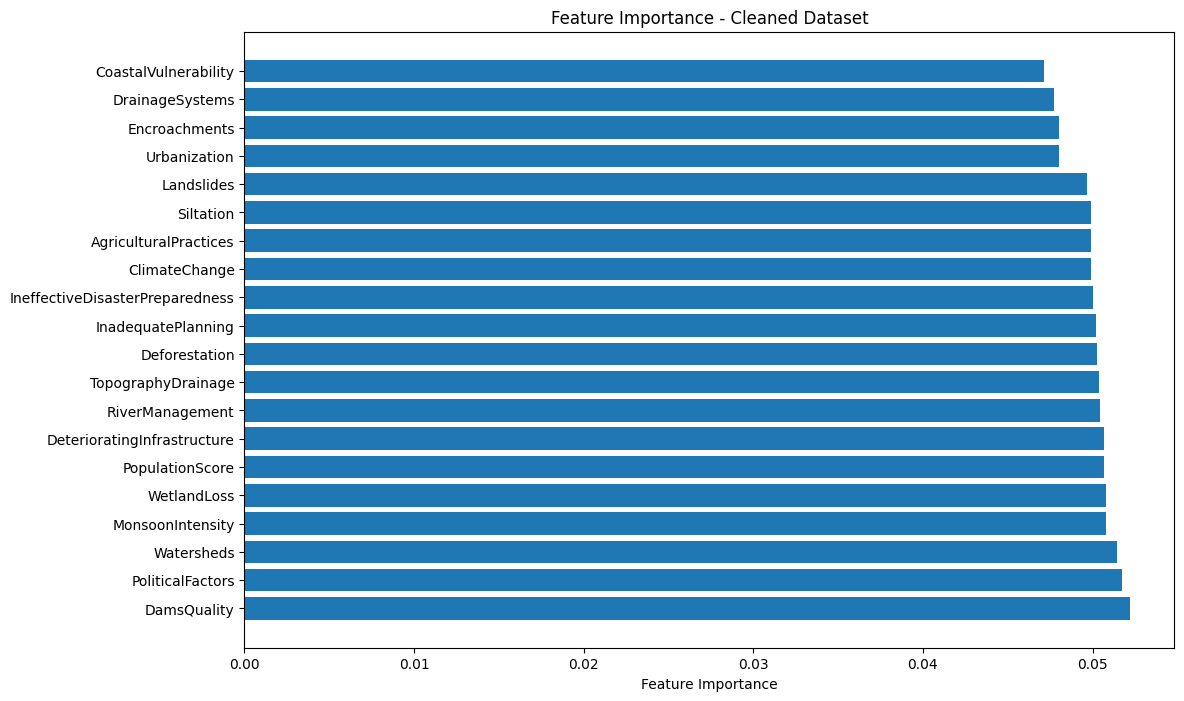

In [ ]:
importances_cleaned = rf_cleaned.feature_importances_
indices_cleaned = np.argsort(importances_cleaned)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(range(len(indices_cleaned)), importances_cleaned[indices_cleaned], align="center")
plt.yticks(range(len(indices_cleaned)), cleaned_df.columns[indices_cleaned])
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Cleaned Dataset")
plt.show()

Feature importance for the Random Forest model (Uncleaned Dataset)

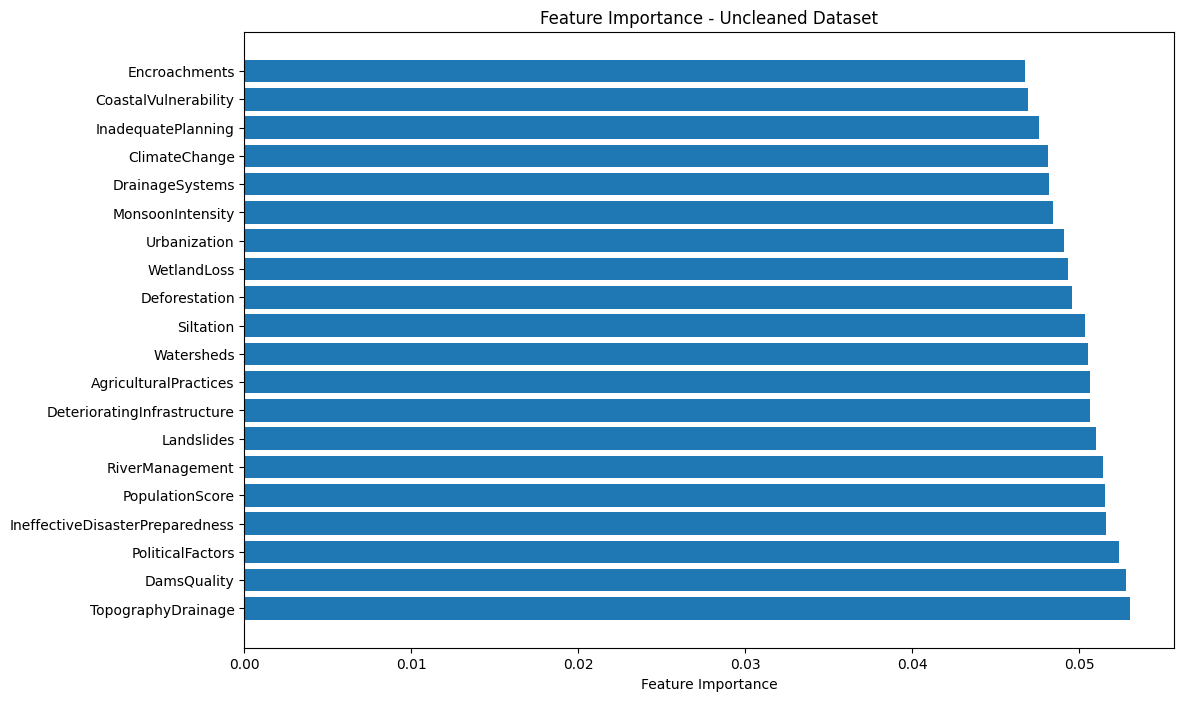

In [ ]:
importances_uncleaned = rf_uncleaned.feature_importances_
indices_uncleaned = np.argsort(importances_uncleaned)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(range(len(indices_uncleaned)), importances_uncleaned[indices_uncleaned], align="center")
plt.yticks(range(len(indices_uncleaned)), uncleaned_df.columns[indices_uncleaned])
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Uncleaned Dataset")
plt.show()